# 🧱 Cuboid Mesh Generation and Visualization Tutorial

In this tutorial, we'll learn how to use the `Cuboid` class and `generate_face_quads` function from the `surface_mesher.cuboid` module to generate and visualize 3D surface meshes using Matplotlib.

We'll cover:
- Creating simple mesh faces
- Creating a full cuboid mesh
- Generating meshes by resolution
- Visualizing everything in 3D

## 📦 1. Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from surface_mesher.cuboid import Cuboid, generate_face_quads


## 📐 2. Generate a simple quadrilateral face using `generate_face_quads`


In [2]:
# Let's define coordinates for a 2D grid in x and y, and fix the z-axis at a value
u = np.array([-1, 0, 1])
v = np.array([-1, 0, 1])

# Generate a face where z is fixed (a horizontal surface)
quads = generate_face_quads(u, v, fixed_axis=2, fixed_value=0)

print(f"Generated {quads.shape[0]} quads.")
print("Each quad has 4 vertices in 3D space.")
print(quads)
print(quads.shape)

Generated 4 quads.
Each quad has 4 vertices in 3D space.
[[[-1. -1.  0.]
  [ 0. -1.  0.]
  [ 0.  0.  0.]
  [-1.  0.  0.]]

 [[-1.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  1.  0.]
  [-1.  1.  0.]]

 [[ 0. -1.  0.]
  [ 1. -1.  0.]
  [ 1.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 1.  0.  0.]
  [ 1.  1.  0.]
  [ 0.  1.  0.]]]
(4, 4, 3)


## 📊 3. Visualize the face using Matplotlib (3D)

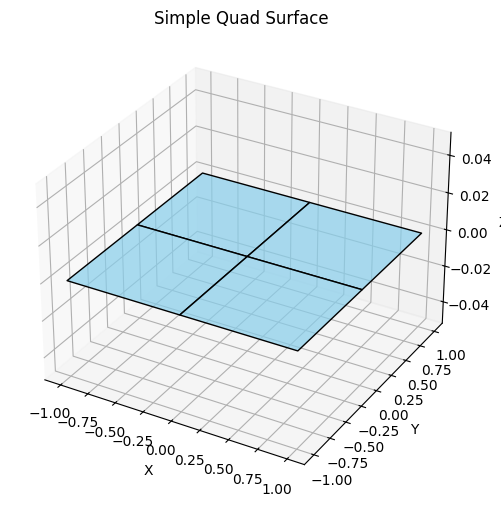

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Add each quad to the 3D plot
poly = Poly3DCollection(quads, facecolors="skyblue", edgecolors="k", alpha=0.7)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Simple Quad Surface")
plt.show()


## 📦 4. Create a 3D Cuboid Mesh using `create_mesh_from_coordinate_arrays`


Generated mesh shape: (22, 4, 3)


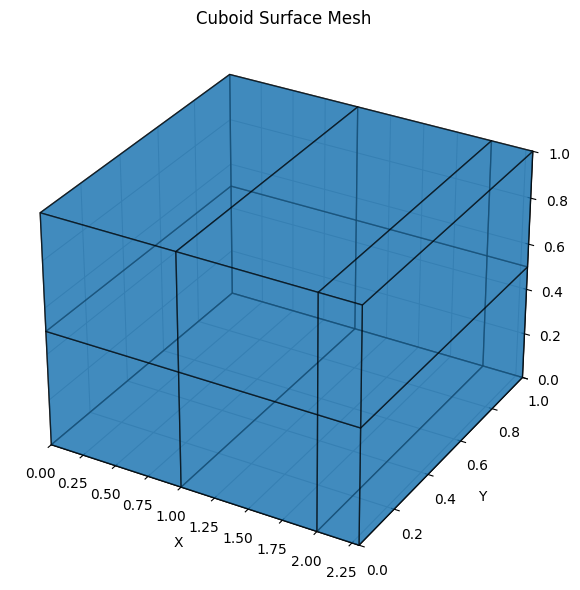

In [4]:
# 🧱 Step 1: Define coordinate arrays for a cuboid
from surface_mesher.cuboid import generate_cuboid_surface


x_coords = [0.0, 1.0, 2.0, 2.3]
y_coords = [0.0, 1.0]
z_coords = [0.0, 0.5, 1.0]

# 🛠️ Step 2: Generate surface mesh
faces = generate_cuboid_surface(x_coords, y_coords, z_coords)
print("Generated mesh shape:", faces.shape)  # (N, 4, 3)

# 🎨 Step 3: Plot the mesh in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create and add polygon collection
mesh = Poly3DCollection(faces, alpha=0.6, edgecolor="k")
ax.add_collection3d(mesh)

# Set plot limits
all_points = faces.reshape(-1, 3)
ax.set_xlim(all_points[:, 0].min(), all_points[:, 0].max())
ax.set_ylim(all_points[:, 1].min(), all_points[:, 1].max())
ax.set_zlim(all_points[:, 2].min(), all_points[:, 2].max())

# Label axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Cuboid Surface Mesh")

plt.tight_layout()
plt.show()


## 📦 5. Create a 3D Cuboid Mesh using `Cuboid`

In [5]:
# Instantiate a Cuboid (length=2, width=1, height=1)
cuboid = Cuboid(length=1, width=1, height=1, origin=np.array([0, 0, 0]))

# Generate the mesh with a edge size of 0.5 units along all axes
mesh = cuboid.create_mesh_from_edge_sizes(0.5)

print(f"Generated cuboid with {mesh.shape[0]} quadrilateral faces.")
print(mesh.shape)

Generated cuboid with 24 quadrilateral faces.
(24, 4, 3)


In [6]:
from surface_mesher.cuboid import generate_axis_coords


generate_axis_coords(-0.5, 0.5, 0.5)

array([-0.5,  0. ])


## 📊 6. Visualize the full cuboid mesh


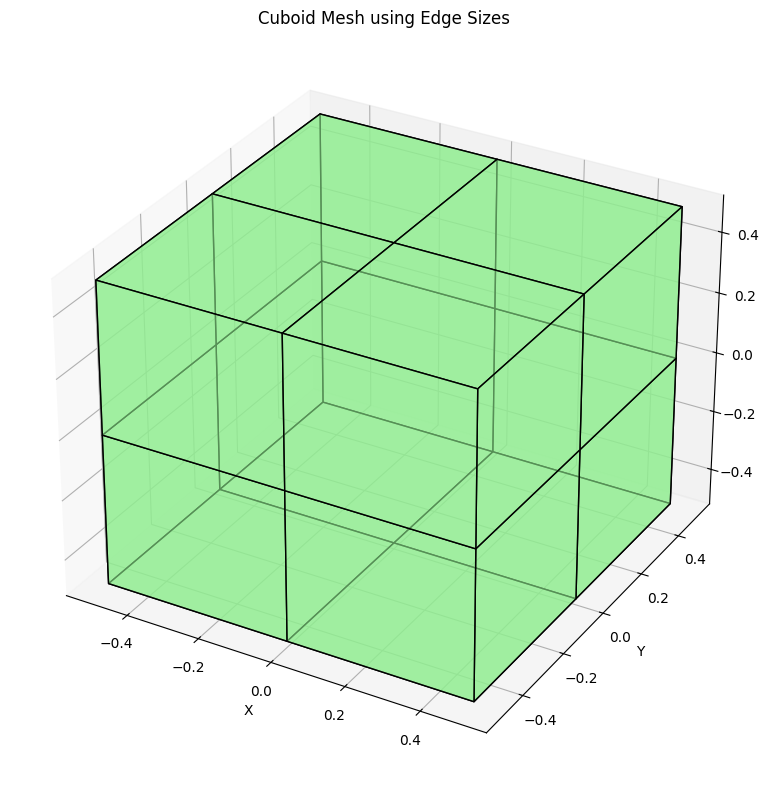

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

poly = Poly3DCollection(mesh, facecolors="lightgreen", edgecolors="k", alpha=0.6)
ax.add_collection3d(poly)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Cuboid Mesh using Edge Sizes")
plt.tight_layout()
plt.show()

## ⚙️ 7. Generate Mesh using `create_mesh_with_resolution`


Generated cuboid with 40 faces using resolution.


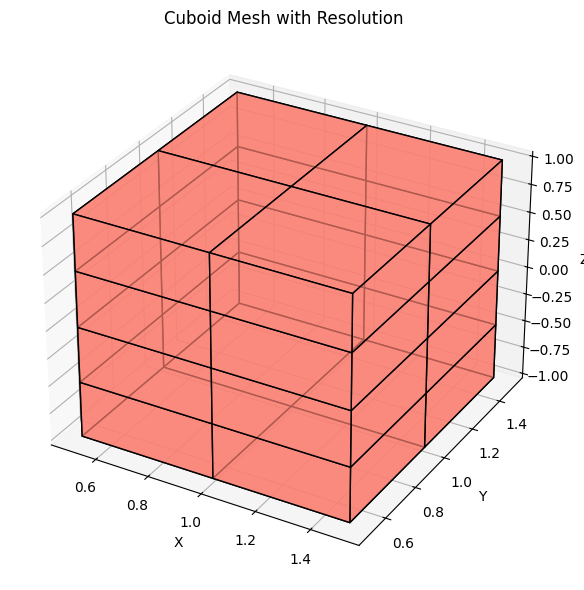

In [8]:
# Create a new cuboid with different origin and shape
cuboid2 = Cuboid(length=1, width=1, height=2, origin=np.array([1, 1, 0]))

# Generate mesh using number of divisions instead of mesh sizes
mesh_div = cuboid2.create_mesh_with_resolution([2, 2, 4])

print(f"Generated cuboid with {mesh_div.shape[0]} faces using resolution.")

# Visualize it
fig2 = plt.figure(figsize=(8, 6))  # Use a new variable for the figure
ax2 = fig2.add_subplot(111, projection="3d")  # Use a new variable for the axes

poly2 = Poly3DCollection(mesh_div, facecolors="salmon", edgecolors="k", alpha=0.7)
ax2.add_collection3d(poly2)

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_title("Cuboid Mesh with Resolution")
plt.tight_layout()
plt.show()


## ✅ Summary

- `generate_face_quads()` helps build a single face of a mesh
- `Cuboid.create_mesh()` uses mesh sizes to build a full 3D cuboid mesh
- `Cuboid.create_mesh_with_resolution()` uses number of divisions instead
- All meshes can be easily plotted using matplotlib’s Poly3DCollection

Feel free to play with dimensions, origins, and mesh resolutions!
